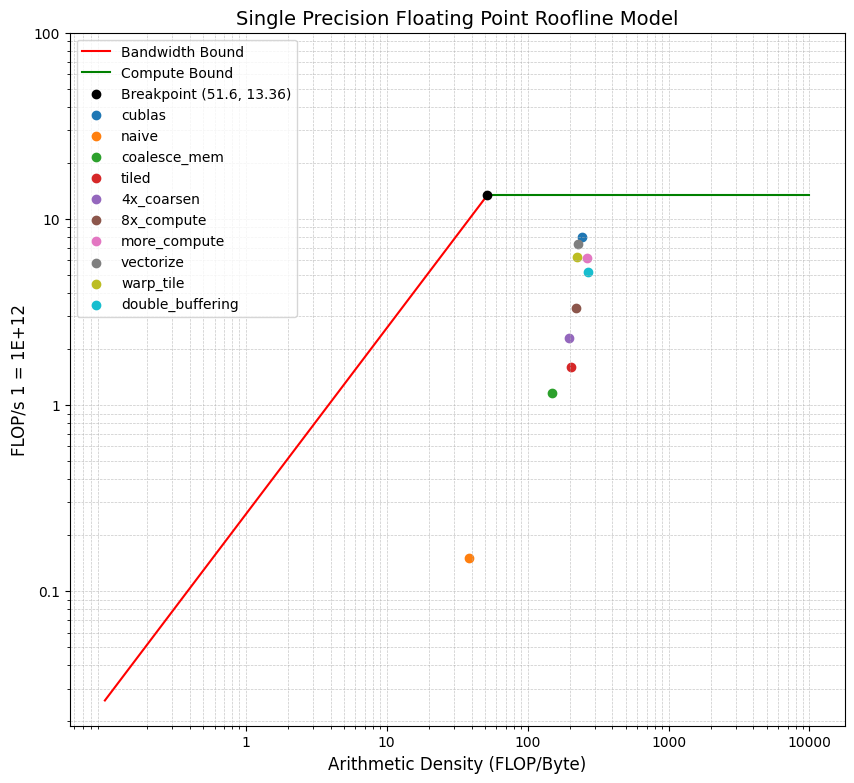

In [18]:
import matplotlib.pyplot as plt
import numpy as np


roofline_ad = 51.60
roofline_flops = 13.36

# 创建图形
plt.figure(figsize=(10, 9))


x1 = np.linspace(0.1, roofline_ad, 500)
y1 = x1 * (roofline_flops / roofline_ad)
plt.plot(x1, y1, color='red', linestyle='-', label='Bandwidth Bound')

x2 = np.linspace(roofline_ad, 10000, 500)
y2 = np.full_like(x2, roofline_flops)  # 水平线
plt.plot(x2, y2, color='green', linestyle='-', label='Compute Bound')

plt.scatter([roofline_ad], [roofline_flops], color='black', zorder=5, label=f'Breakpoint ({roofline_ad}, {roofline_flops})')



kernels = {
    "cublas": (243.59, 7.97),
    "naive": (38.62, 0.15),
    "coalesce_mem": (150.16, 1.16),
    "tiled": (202.99, 1.60),
    "4x_coarsen": (195.20, 2.29),
    "8x_compute": (221.61, 3.31),
    "more_compute": (264.78, 6.17),
    "vectorize": (228.26, 7.30),
    "warp_tile": (225.77, 6.21),
    "double_buffering": (267.94, 5.21)
}

for name, (ad, flops) in kernels.items():
    plt.scatter(ad, flops, label=name)

# 设置横轴和纵轴为对数刻度
plt.xscale('log')
plt.yscale('log')

# 设置横轴和纵轴刻度
plt.xticks([1, 10, 100, 1000, 10000], ['1', '10', '100', '1000', '10000'])
plt.yticks([0.1, 1, 10, 100], ['0.1', '1', '10', '100'])

# 添加标题和标签
plt.title('Single Precision Floating Point Roofline Model', fontsize=14)
plt.xlabel('Arithmetic Density (FLOP/Byte)', fontsize=12)
plt.ylabel('FLOP/s 1 = 1E+12', fontsize=12)

# 添加网格线
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)


# 显示图例
plt.legend()

# 显示图形
plt.show()

In [5]:
from tabulate import tabulate

# 创建数据
data = [
    ["32 x 32", "32 x 32", 64, 64 * 2, 64 * 32 * 2, 1, 1, 128, 4096, 1],
    ["128 x 8", "8 x 128", 256, 256 * 2 * 4, 256 * 8 * (8 + 8), 64, 64, 32, 512, 1],
]

headers = ["A_TILE", "B_TILE", "steps", "global load", "smem load", "global store", "element_com", "per_gl", "per_sl", "per_gs"]

# 打印表格
print(tabulate(data, headers=headers, tablefmt="grid"))

+----------+----------+---------+---------------+-------------+----------------+---------------+----------+----------+----------+
| A_TILE   | B_TILE   |   steps |   global load |   smem load |   global store |   element_com |   per_gl |   per_sl |   per_gs |
+==========+==========+=========+===============+=============+================+===============+==========+==========+==========+
| 32 x 32  | 32 x 32  |      64 |           128 |        4096 |              1 |             1 |      128 |     4096 |        1 |
+----------+----------+---------+---------------+-------------+----------------+---------------+----------+----------+----------+
| 128 x 8  | 8 x 128  |     256 |          2048 |       32768 |             64 |            64 |       32 |      512 |        1 |
+----------+----------+---------+---------------+-------------+----------------+---------------+----------+----------+----------+
